# **Data importing and cleaning**

In [ ]:
#importing the libs that we'll be needing.
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from datetime import datetime

#importing the data set we'll be using
df = pd.read_excel('OpenStore')

#checking it's first 5 rows 
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,customer_id,day,gross_sales,discounts,returns,net_sales
1,NaN,155408203782,2018-01-01 00:00:00,32,0,0,32
2,NaN,155268743174,2018-01-01 00:00:00,48,0,0,48
3,NaN,155139735558,2018-01-01 00:00:00,40,0,0,40
4,NaN,155121385478,2018-01-01 00:00:00,40,0,0,40


In [ ]:
#fixing the headers
df. columns=df. iloc[0]
df.head()

,NaN,customer_id,day,gross_sales,discounts,returns,net_sales
0,NaN,customer_id,day,gross_sales,discounts,returns,net_sales
1,NaN,155408203782,2018-01-01 00:00:00,32,0,0,32
2,NaN,155268743174,2018-01-01 00:00:00,48,0,0,48
3,NaN,155139735558,2018-01-01 00:00:00,40,0,0,40
4,NaN,155121385478,2018-01-01 00:00:00,40,0,0,40


In [ ]:
#drop first row 
df = df.iloc[1: , :]
df.head()

,NaN,customer_id,day,gross_sales,discounts,returns,net_sales
1,NaN,155408203782,2018-01-01 00:00:00,32,0,0,32
2,NaN,155268743174,2018-01-01 00:00:00,48,0,0,48
3,NaN,155139735558,2018-01-01 00:00:00,40,0,0,40
4,NaN,155121385478,2018-01-01 00:00:00,40,0,0,40
5,NaN,155076231174,2018-01-01 00:00:00,67,0,0,67


In [ ]:
#drop first column {since it's just empty values}
df = df.iloc[: , 1:]
df.head()

,customer_id,day,gross_sales,discounts,returns,net_sales
1,155408203782,2018-01-01 00:00:00,32,0,0,32
2,155268743174,2018-01-01 00:00:00,48,0,0,48
3,155139735558,2018-01-01 00:00:00,40,0,0,40
4,155121385478,2018-01-01 00:00:00,40,0,0,40
5,155076231174,2018-01-01 00:00:00,67,0,0,67


In [ ]:
#understanding our data structure and checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32888 entries, 1 to 32888
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  32888 non-null  object
 1   day          32888 non-null  object
 2   gross_sales  32888 non-null  object
 3   discounts    32888 non-null  object
 4   returns      32888 non-null  object
 5   net_sales    32888 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [ ]:
#transforming our numeric values into intergers / floats for better handling
df['customer_id'].astype(str).astype(int)
df['gross_sales'].astype(str).astype(float)
df['discounts'].astype(str).astype(float)
df['returns'].astype(str).astype(float)
df['net_sales'].astype(str).astype(float)

1         32.0
2         48.0
3         40.0
4         40.0
5         67.0
         ...  
32884    116.0
32885     40.0
32886     43.0
32887     40.0
32888     40.0
Name: net_sales, Length: 32888, dtype: float64

In [ ]:
#transforming our invoicedate to a date format
df['day'] = pd.to_datetime(df['day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32888 entries, 1 to 32888
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  32888 non-null  object        
 1   day          32888 non-null  datetime64[ns]
 2   gross_sales  32888 non-null  object        
 3   discounts    32888 non-null  object        
 4   returns      32888 non-null  object        
 5   net_sales    32888 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.5+ MB


In [ ]:
#adding a year, a month, a day of week, hour and yearmonth column
df['year'] = pd.DatetimeIndex(df['day']).year
df['month'] = pd.DatetimeIndex(df['day']).month
df['year-month'] = pd.to_datetime(df['day']).dt.to_period('M')
df['dayOfweek'] = pd.DatetimeIndex(df['day']).dayofweek #monday is 0, tuesday is 1...
df.head()

,customer_id,day,gross_sales,discounts,returns,net_sales,year,month,year-month,dayOfweek
1,155408203782,2018-01-01,32,0,0,32,2018,1,2018-01,0
2,155268743174,2018-01-01,48,0,0,48,2018,1,2018-01,0
3,155139735558,2018-01-01,40,0,0,40,2018,1,2018-01,0
4,155121385478,2018-01-01,40,0,0,40,2018,1,2018-01,0
5,155076231174,2018-01-01,67,0,0,67,2018,1,2018-01,0


In [ ]:
#checked on the excel model that no customer did 2 transactions in the same date, so I'll create a "transaction_id" column to ease the cohort building
df.insert(0, 'transaction_id', range(1, 1 + len(df)))
df.head()

,transaction_id,customer_id,day,gross_sales,discounts,returns,net_sales,year,month,year-month,dayOfweek
1,1,155408203782,2018-01-01,32,0,0,32,2018,1,2018-01,0
2,2,155268743174,2018-01-01,48,0,0,48,2018,1,2018-01,0
3,3,155139735558,2018-01-01,40,0,0,40,2018,1,2018-01,0
4,4,155121385478,2018-01-01,40,0,0,40,2018,1,2018-01,0
5,5,155076231174,2018-01-01,67,0,0,67,2018,1,2018-01,0


Okay, ETL done, let's do the cohort building part

# **Cohort building**

In [ ]:
#calculating an aggregate metric indicating how many orders were placed by each customer
n_orders = df.groupby('customer_id').nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['customer_id'].nunique()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


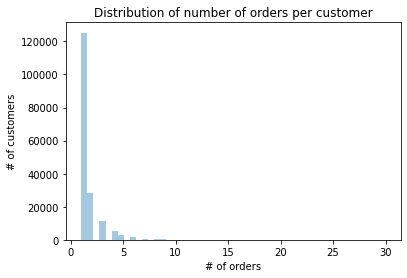

In [ ]:
#visualizing the distribution of the number of orders per customer
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [ ]:
#assumption: the cohort each customer belongs to is based on their first purchase date

#step 1, we create a clean df by keeping only the relevant columns and dropping duplicated values
base_df = df[['customer_id', 'transaction_id', 'day']].drop_duplicates()
base_df.head()

,customer_id,transaction_id,day
1,155408203782,1,2018-01-01
2,155268743174,2,2018-01-01
3,155139735558,3,2018-01-01
4,155121385478,4,2018-01-01
5,155076231174,5,2018-01-01


In [ ]:
#step 2
#we create the cohort variable {indicates the monthly cohort based on the first purchase date (calculated per customer)}
#we create the order_month variable {the truncated month of the purchase date}

df['order_month'] = base_df['day'].dt.to_period('M')
df['cohort'] = df.groupby('customer_id')['day'] \
                 .transform('min') \
                 .dt.to_period('M')

In [ ]:
#step 3
#we aggregate the data per cohort and order_month and count the number of unique customers in each group
#we also add the period_number, which indicates the number of periods between the cohort month and the month of the purchase

df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_id', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [ ]:
#step 4
#we pivot the df_cohort table so that each row contains information about a given cohort and each column contains values for a certain period
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [ ]:
#step 5
#to obtain the retention visualization, we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

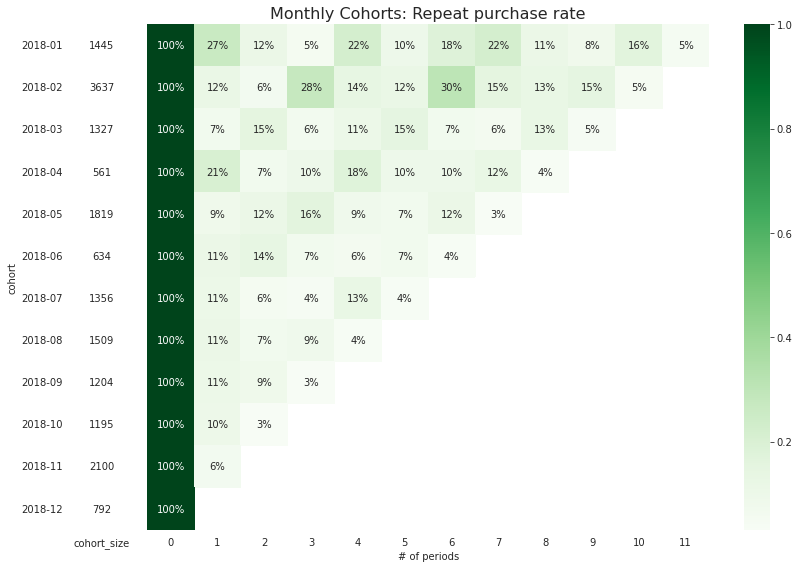

In [ ]:
#step 6
#we plot our matrix and visualize our retention {plotting an all white matrix to add the cohort size information}

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='Greens', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: Repeat purchase rate', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

***Please explain what the repeat rate could mean. What are some explanations for a low repeat purchase rate (e.g., below 10%) and a high repeat purchase rate (e.g., above 60%). Can you give a few examples?***

Answer: Given the visualization above (seeing a very steep drop-off), and not knowing what product Melon sells, there's a couple of things that their repeat rate could mean, for example, that:
1. They sell products that customers do not buy with recurrence (e.g., kitchen appliances), and either haven't figured out what adjacent products they can sell that complements their offerings (for kitchen appliances, let's say kitchenware, as something you tend to buy more frequently) or they just simply have a business model that will relay on volume and one time purchases.
2. They sell products that customers do buy with recurrence (e.g., they're a fruit ecommerce, living up to their name), but either their quality is subpar, disappointing a big share of their new customers, causing them not to buy again, or they haven't figured out how to leverage their business model in a recurring way (this could be by offering a rewards program for returning customers, clarifying that they have the capabilities to deliver fruits in a recurring matter, etc.)

I believe some explanations for a low repeat rate can be convered by the points above

As for, explanations for a high repeat purchase, besides citing the opposite of the points above (e.g., selling products that customers buy with recurrence, with a recurrent/retention strategy implemented), businesses with high repeat purchase rates could be offering access to a product that's recurrent, but due to any number of reasons, customers do not buy them as frequent as they should (one example that comes to mind is how Dollar Shave Club brought recurrency to buying razor blades, a product that men didn't buy/switch as often as they should).